 <img style="float: left;" src="https://i.redd.it/ar1f8fux9kp51.png" width=300 alt="" />

# Counts

### Task: Write a function that takes a list and returns a dictionary where the list items are dict keys and the value is how often the item appears in the original list

```python
counts(ls: list, case=False, stringAll=False, sort=False)
```

The function, `counts()`, takes an input of a list <b>(ls)</b> and returns a single output of a dictionary <b>(dict)</b>. The function starts by creating an empty dictionary **dict**. The function loops through each item in the list and if the item is not already in dict it adds it as a key with a value of 1. If the same item apprears in the list again then the value is incremented by 1 each time it appears.

There are three optional parameters for counts(), **case**, **stringAll** and **sort** . 

By default **stringAll** is set to `False`. If stringAll is set to `True` each item is converted to a string before it is checked. This allows for more accurate counting of numbers if there is a mix of data types in the list. For example 1 and "1" would not counted as two seperate entries but insetad both counted as "1". 

By default **case** is set to `False`. If case is set to `True` each item in the list is set to lowercase before it is checked to see if it is in the dictionary. This allows letters to be counted together regardless of whether they are lower or uppercase.

By default **sort** is set to `False`. If sort is set to `True` the at the end of the function a sorting loop uses the dict method `sorted()` to get a list of sorted keys for the dict. It then uses this list to add the key-value pairs from dict to a new dictionary sortdict. When that is complete it returns sortdict instead of dict.

In [38]:
def counts(ls: list, case=False, stringAll=False, sort=False) -> dict:
    dict = {} # creates an empty dictionary
    
    try:
        for i in ls: # loop through each item in list   

            if stringAll == True:
                i = str(i)
            if case == True and type(i) == str:
                i = i.lower()

            try:
                if i in dict:

                    # if the item is already in list increase its value by 1
                    dict[i] += 1

                    # otherwise add the item to the dict setting it's value to 1
                else:
                    dict[i] = 1  

                    # exception handling for type errors
            except TypeError: 
                i_type = str(type(i))
                print(f"We had trouble counting {i} because it was a {i_type}")
                
        if sort == True:
            sortdict = {}
            for i in sorted(dict):
                sortdict[i] = dict[i]
                
            return sortdict
        elif sort == False: 
            return dict
        
    except TypeError: # exception handling for non-iterable arguments
            
        print(f"Error: invalid argument {str(type(ls))}")
        print("counts() function takes a list or string as argument")


The below example shows how the counts function can be used on characters in a string.

In [85]:
x = counts("MAry hAd a little Lamb", sort=True)

print(x)

{' ': 4, 'A': 2, 'L': 1, 'M': 1, 'a': 2, 'b': 1, 'd': 1, 'e': 1, 'h': 1, 'i': 1, 'l': 2, 'm': 1, 'r': 1, 't': 2, 'y': 1}


<p>In the below example we convert all values to lowercase by setting the case variable to <b>True</b>.
<p>In the output we can see that now M & m are included as a single key, as are A & a and L & l.

In [4]:
y = counts("MAry hAd a little Lamb", case=True)

print(y)

{'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1}


<p>The below examples show how the counts function works on list of strings and numbers.

In [5]:
a = counts([1, 2, "1", "2", 6, 7, 8, "3", "4", "1"])

print(a)

{1: 1, 2: 1, '1': 2, '2': 1, 6: 1, 7: 1, 8: 1, '3': 1, '4': 1}


<p>Below we set the stringAll parameter to <b>True</b> convert each item to the string data type.
<p>The output below shows that integer and string values for numerical entries are counted as a single string value.

In [6]:
b = counts([1, 2, "1", "2", 6, 7, 8, "3", "4", "1"], stringAll=True)

print(b)

{'1': 3, '2': 2, '6': 1, '7': 1, '8': 1, '3': 1, '4': 1}


The below example shows how the counts function operates when the list contains items that cannot be counted such as lists and dictionaries. The items are not counted but a message is printed to the user to give them more information.

In [7]:
Z = counts([1, "yes", ("yes", "no"), ["no", "yes"], 
            {'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1},
            1, 2, 3, 4])
print(Z)

We had trouble counting ['no', 'yes'] because it was a <class 'list'>
We had trouble counting {'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1} because it was a <class 'dict'>
{1: 2, 'yes': 1, ('yes', 'no'): 1, 2: 1, 3: 1, 4: 1}


The final example here demostrates how the function handles argument that cannot be iterated over such as an int

In [8]:
counts(1235)

Error: invalid argument <class 'int'>
counts() function takes a list or string as argument


<img style="float: left;" src="https://i.pinimg.com/originals/3a/34/6b/3a346b536b6a6f5de274bbbff7908ec0.gif" alt="" />

# dicerolls
***
### Task: Write a Python function called dicerolls that simulates rolling dice. The function should take 2 parameters k, the number of dice to roll, and n, the number of times to roll the dice.

The function `dicerolls()` takes 2 parameters **k** and **n** and returns a dictionary of simulated dicerolls where the keys are the numbers rolled and the values are how many times that number was rolled in n trials.
```python
dicerolls(k, n)
```
- **k**: The k parameter sets how many dice should be used in the simulation. k must be a int.
- **n**: The parameter n represents the number of trials of the simulation of rolling k number of dice. n must be an int

The function begins by defining a function for generating a dice roll `dice()`. dice() uses the stdlib module random to choose a number at random between 1-6 inclusive of 6.

Next the empty dictionary dict is intialised. Then we use a `for loop` to simulate the dice roll n times, range(0, n). For each trial we use a variable `roll` to store the value of the dice roll. Again we use another for loop to execute the dice function k times to simulate k amount of dice being rolled.

Now that we have a result of the roll we use an `if statement` to check if that result has been been stored in our dictionary dict. If roll already exists as a key we can increment the value by 1. If the key does not exist yet we can add it with an intial value of 1.

The dictionary dict is created in no particular order. Because we want to analyse the results we would prefer to have the keys in order ranging from smallest to largest roll. We use the sorted() function and a short for loop to create a new dictionary `sortdict` with the keys in order from smallest to largest. The programme ends as it returns sortdict as its return value.

In [81]:
import random
import numpy as np
import seaborn as sns

In [ ]:
def dicerolls(k: int, n: int) -> dict:
    
    def dice():
        roll = random.randint(1,6)
        return roll  
    
    dict = {}
    for i in range(0,n):
        roll = 0
        for i in range(0,k):
            roll += dice()
                    
        if roll in dict:
            # if the item is already in list increase its value by 1 
            dict[roll] += 1
            # otherwise add the item to the dict setting it's value to 1
        else:
            dict[roll] = 1
    sortdict = {}
    for i in sorted(dict):
        sortdict[i] = dict[i]   
        
    return sortdict
    

In [83]:
x = dicerolls(k=1, n=1000)

print(x)

#print(sorted(x))

{1: 182, 2: 159, 3: 169, 4: 166, 5: 171, 6: 153}


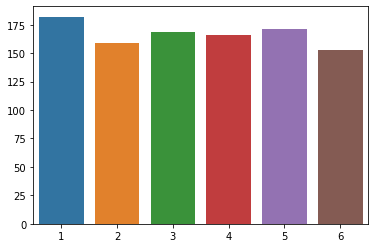

In [84]:
sns.barplot(x=list(x.keys()), y=list(x.values()))

In [75]:
y = dicerolls(k=2, n=1000)

print(y)

{2: 30, 3: 51, 4: 79, 5: 135, 6: 133, 7: 158, 8: 143, 9: 111, 10: 75, 11: 57, 12: 28}


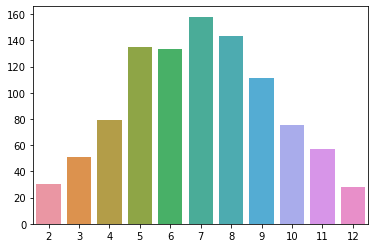

In [76]:
sns.barplot(x=list(y.keys()), y=list(y.values()))

In [79]:
z = dicerolls(k=5, n=10000)

print(z)

{5: 2, 6: 7, 7: 22, 8: 49, 9: 68, 10: 162, 11: 278, 12: 387, 13: 563, 14: 659, 15: 830, 16: 967, 17: 1007, 18: 997, 19: 909, 20: 880, 21: 722, 22: 552, 23: 394, 24: 245, 25: 140, 26: 110, 27: 30, 28: 14, 29: 5, 30: 1}


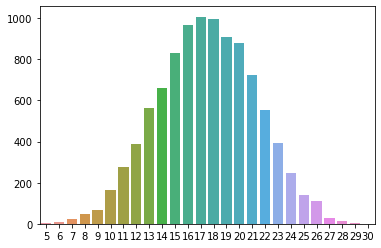

In [80]:
sns.barplot(x=list(z.keys()), y=list(z.values()))

<img style="float: left;" src="https://media1.tenor.com/images/507d58a626fa15cb0b57e57f7a1cb873/tenor.gif" alt="" />

# coin_flip
***

In [4]:
from numpy.random import binomial
import matplotlib.pyplot as plt

(array([  9.,  35.,  80., 189., 224., 223., 167.,  47.,  20.,   6.]),
 array([35. , 38.1, 41.2, 44.3, 47.4, 50.5, 53.6, 56.7, 59.8, 62.9, 66. ]),
 <a list of 10 Patch objects>)

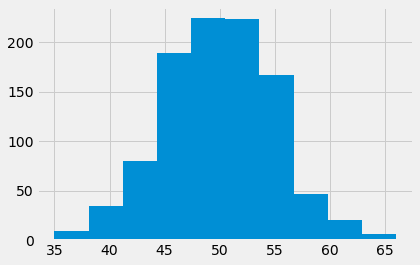

In [14]:
n, p = 100, .5
s = binomial(n, p, 1000)

plt.hist(s)


# References